In [340]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vitualization
import seaborn as sns

# transformation
import scipy

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.inspection import permutation_importance
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix


In [341]:
# load dataset
Train_data = pd.read_csv("ML/application_train.csv")
Test_data = pd.read_csv("ML/application_test.csv")
Bureau_data = pd.read_csv("ML/bureau_balance.csv")
creditcard_data = pd.read_csv("ML/credit_card_balance.csv")
POS_data = pd.read_csv("ML/POS_CASH_balance.csv")

In [342]:
# view application train dataset
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# view application test dataset
Test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
# explore the data column type distribution
Train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [344]:
# explore column stat for object type for application_train_data
Train_data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [345]:
Train_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<IPython.core.display.Javascript object>


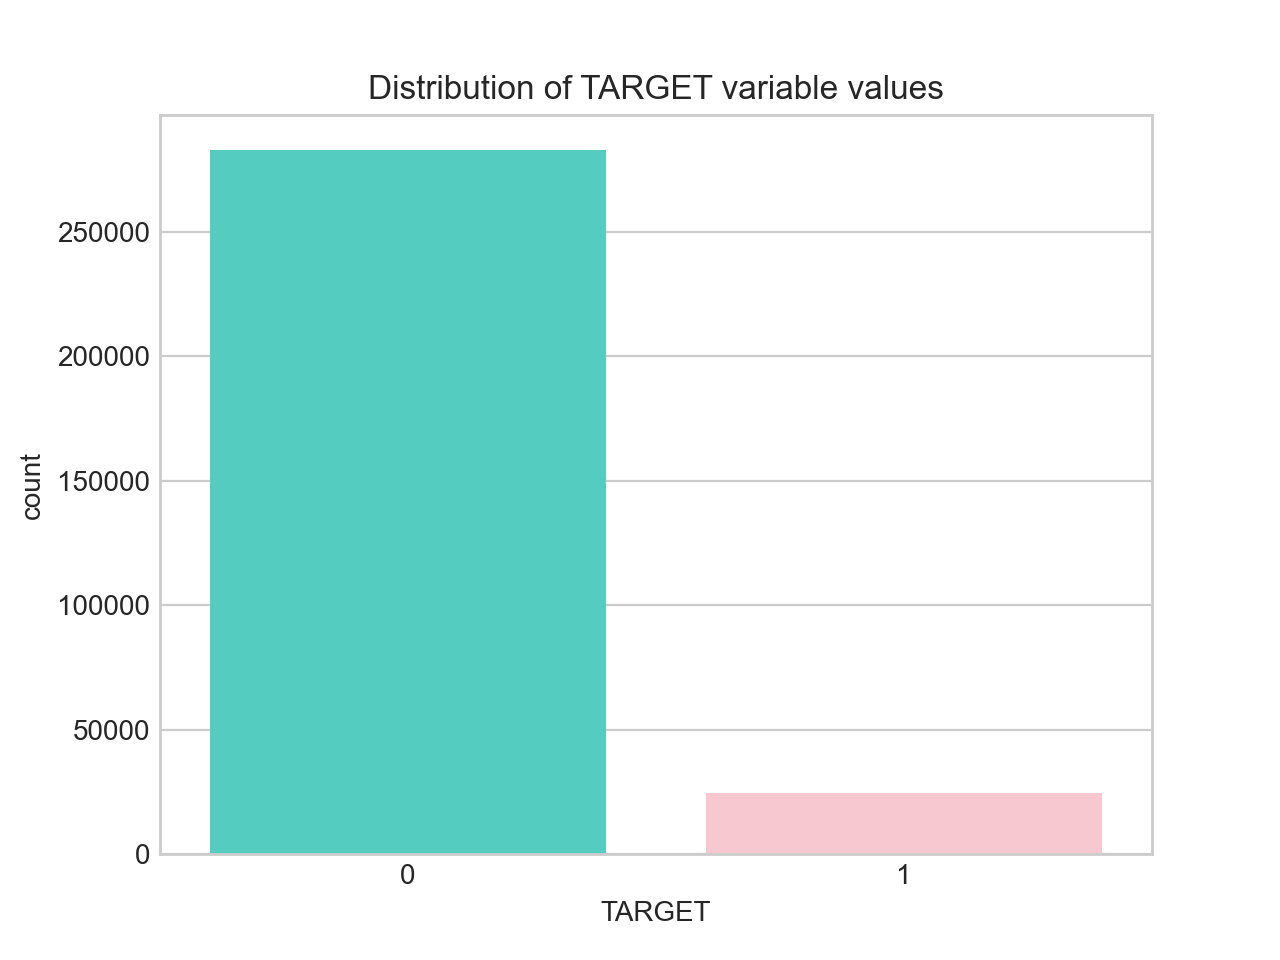

In [346]:
plt.title('Distribution of TARGET variable values')
sns.countplot(x=Train_data.TARGET, palette= ["#40E0D0", "pink"]);

In [347]:
# correlations of top 10 features with the target variable and sort 
correlations = Train_data.corr()['TARGET'].sort_values(ascending=False)

# Display highest correlations in both directions
print('Positive Correlations:\n', correlations.head(10))

Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


 Build a classification tree using Python. Only use the top-ten variables and Plot the tree visualization.

In [348]:
# creating list of the top ten correlating variables
features_col = ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 
                'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY','TARGET','FLAG_DOCUMENT_3','REG_CITY_NOT_LIVE_CITY',
               'FLAG_EMP_PHONE']
# construct new data set
n_Train_data = Train_data[features_col]
n_Train_data['DAYS_BIRTH'] = n_Train_data['DAYS_BIRTH']/-365
n_Train_data['DAYS_ID_PUBLISH'] = n_Train_data['DAYS_ID_PUBLISH']/-365
n_Train_data['DAYS_LAST_PHONE_CHANGE']= n_Train_data['DAYS_LAST_PHONE_CHANGE']/-365
n_Train_data.head()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,TARGET,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE
0,25.920548,2,2,3.106849,5.808219,0,1,1,0,1
1,45.931507,1,1,2.268493,0.797260,0,0,1,0,1
2,52.180822,2,2,2.232877,6.934247,0,0,0,0,1
3,52.068493,2,2,1.690411,6.676712,0,0,1,0,1
4,54.608219,2,2,3.030137,9.473973,1,0,0,0,1


In [349]:
#extract features and target variable
n_Train_data = n_Train_data.dropna()

features= ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY']

X = n_Train_data[features]
y = n_Train_data.TARGET

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()


In [350]:
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [351]:
# evaluate training model
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_train)
    test_pred = model_pipeline.predict(X_test)
    
    train_pred_proba = model_pipeline.predict_proba(X_train)
    test_pred_proba = model_pipeline.predict_proba(X_test)
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_test, test_pred))

In [352]:
evaluate_model(clf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.5991
Validation roc auc score= 0.5920

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[197960      0]
 [ 17297      0]]
Validation confusion matrix:
 [[84725     0]
 [ 7528     0]]


<IPython.core.display.Javascript object>


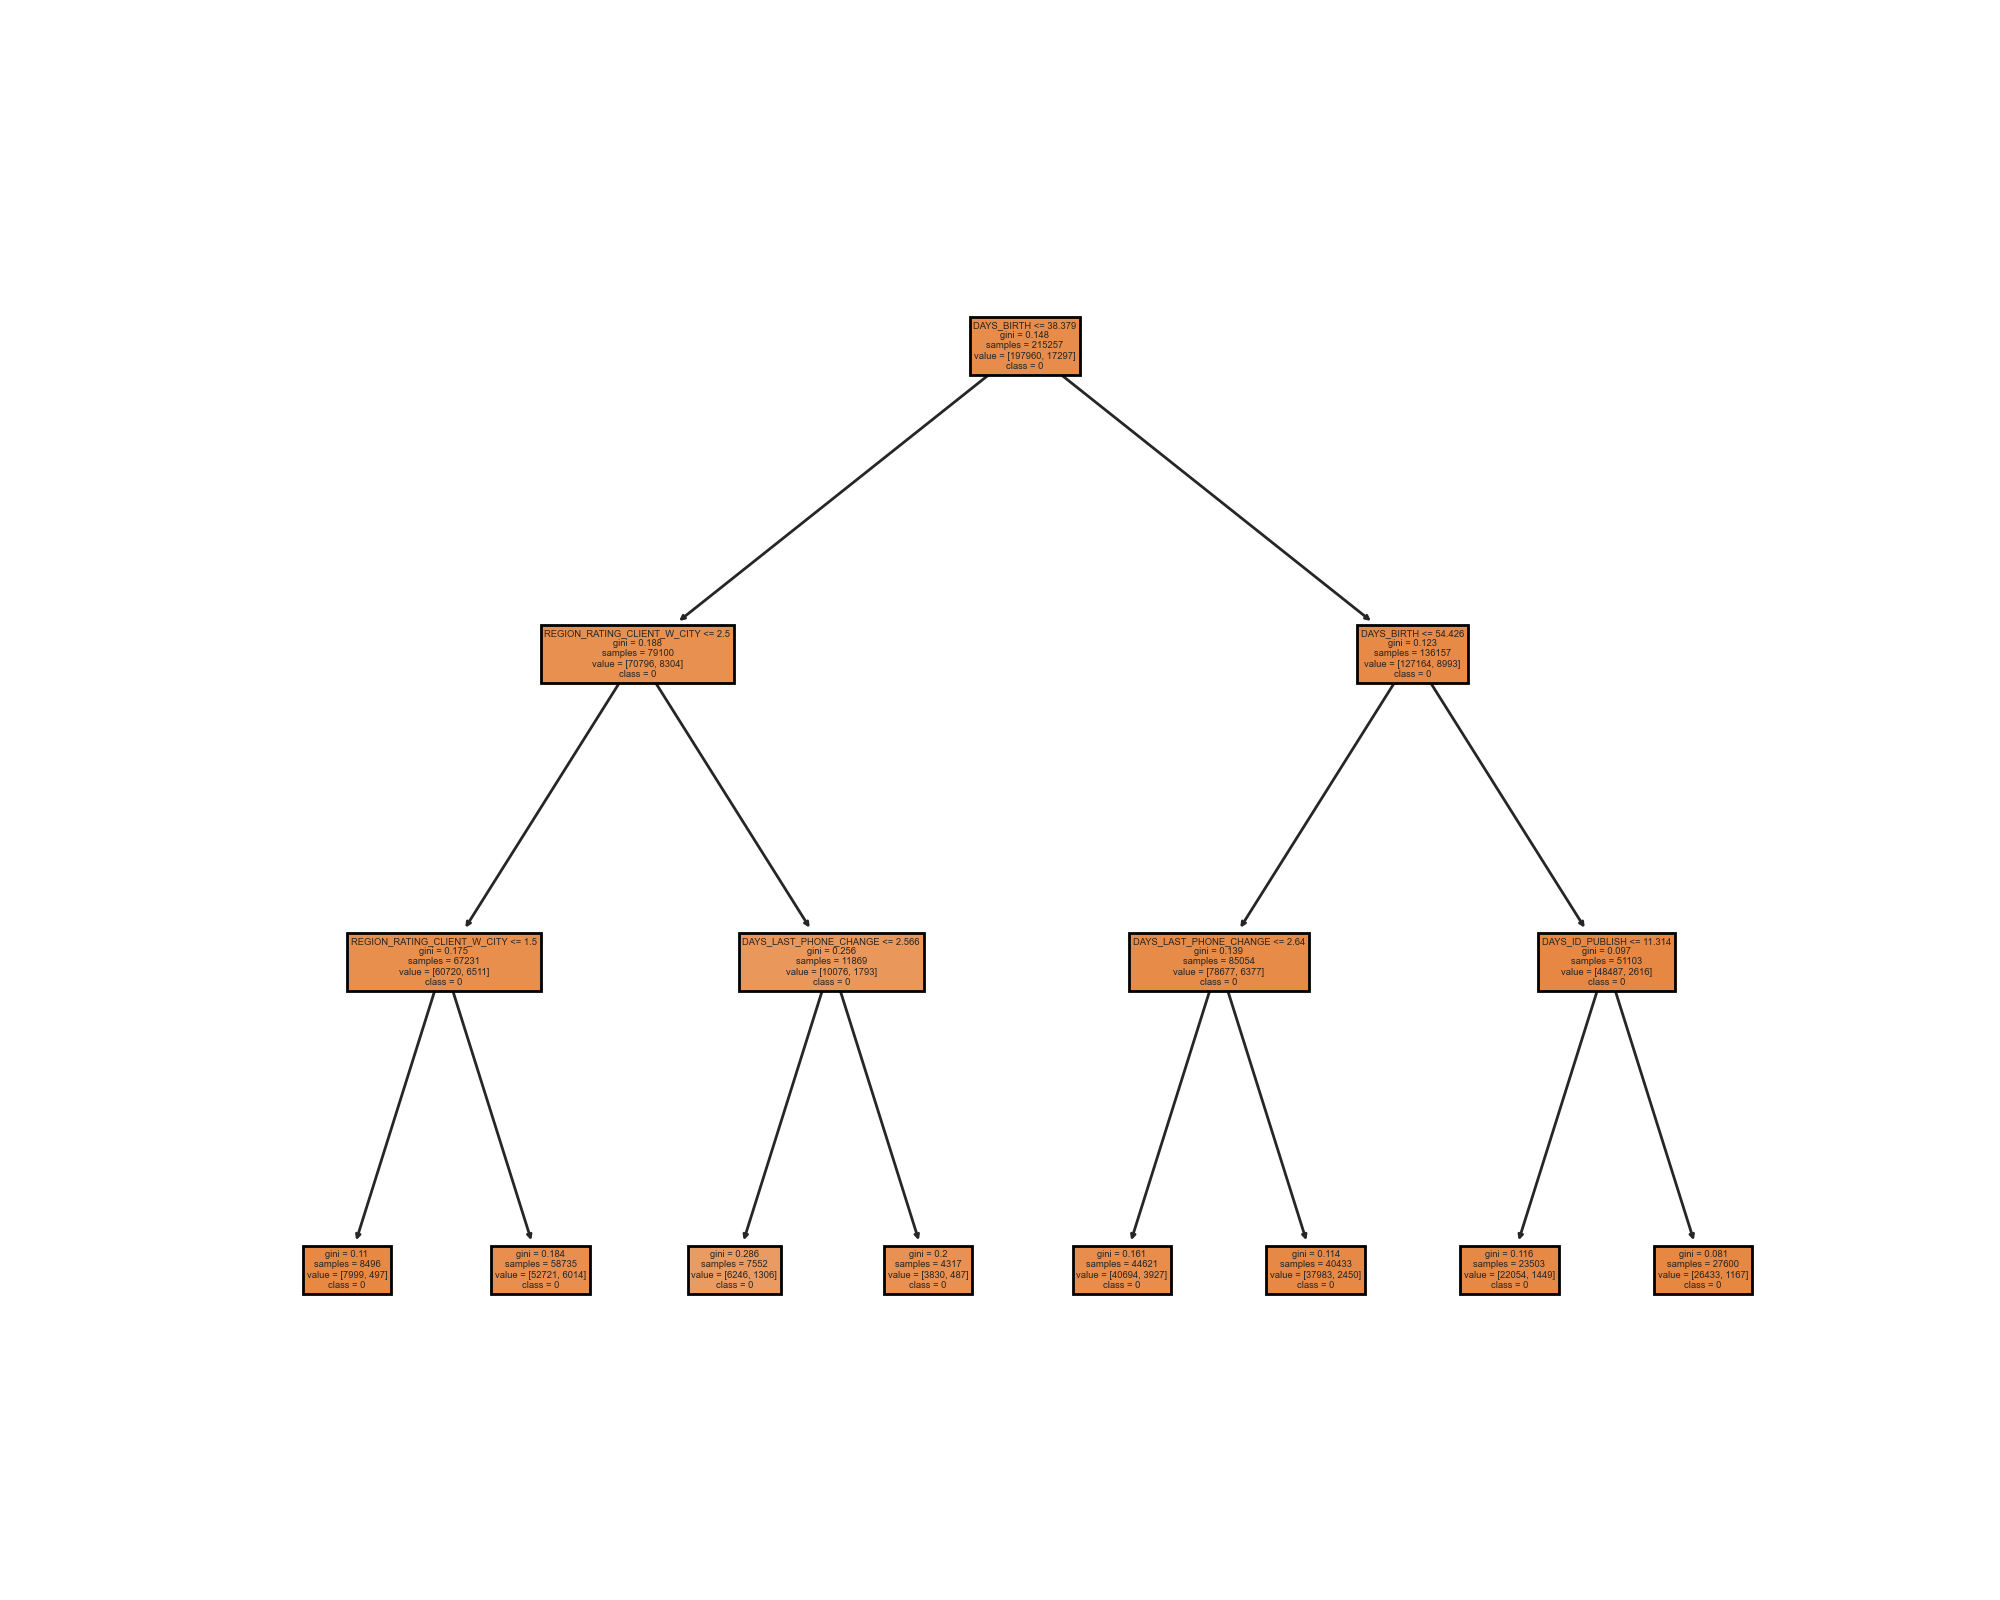

[Text(0.5, 0.875, 'DAYS_BIRTH <= 38.379\ngini = 0.148\nsamples = 215257\nvalue = [197960, 17297]\nclass = 0'),
 Text(0.25, 0.625, 'REGION_RATING_CLIENT_W_CITY <= 2.5\ngini = 0.188\nsamples = 79100\nvalue = [70796, 8304]\nclass = 0'),
 Text(0.125, 0.375, 'REGION_RATING_CLIENT_W_CITY <= 1.5\ngini = 0.175\nsamples = 67231\nvalue = [60720, 6511]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.11\nsamples = 8496\nvalue = [7999, 497]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.184\nsamples = 58735\nvalue = [52721, 6014]\nclass = 0'),
 Text(0.375, 0.375, 'DAYS_LAST_PHONE_CHANGE <= 2.566\ngini = 0.256\nsamples = 11869\nvalue = [10076, 1793]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.286\nsamples = 7552\nvalue = [6246, 1306]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.2\nsamples = 4317\nvalue = [3830, 487]\nclass = 0'),
 Text(0.75, 0.625, 'DAYS_BIRTH <= 54.426\ngini = 0.123\nsamples = 136157\nvalue = [127164, 8993]\nclass = 0'),
 Text(0.625, 0.375, 'DAYS_LAST_PHONE_CHANGE <= 2.64\ngini = 0.139

In [356]:
# plot of decision tree clasifier
label = ['0', '1']
plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train), feature_names=feature_names, class_names=label, filled=True)

In [357]:
Train_data['DAYS_BIRTH'] = Train_data['DAYS_BIRTH']/-365
Train_data['DAYS_ID_PUBLISH'] = Train_data['DAYS_ID_PUBLISH']/-365
Train_data['DAYS_LAST_PHONE_CHANGE']= Train_data['DAYS_LAST_PHONE_CHANGE']/-365
Train_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


 Build a Random Forest and plot the variable importance chart from the Random Forest

In [358]:
# Continous columns will be a good features to first consider for machine learning model
#extract continuous columns
numerical_cols = list(Train_data.select_dtypes(exclude='object').columns)


In [388]:
#extract features and target variable

rnd_Train_data = Train_data[numerical_cols]
rnd_Train_data = rnd_Train_data.dropna()

X = rnd_Train_data.drop('TARGET', axis = 1)
y = rnd_Train_data.TARGET

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

In [389]:
# Building random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes= 16, n_jobs=-1)
model_clf = rnd_clf.fit(X_train, y_train)

y_pred_rf = model_clf.predict(X_test)   

In [390]:
evaluate_model(model_clf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.8652
Validation roc auc score= 0.7415

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[7479    0]
 [ 466    0]]
Validation confusion matrix:
 [[3187    0]
 [ 219    0]]


<IPython.core.display.Javascript object>


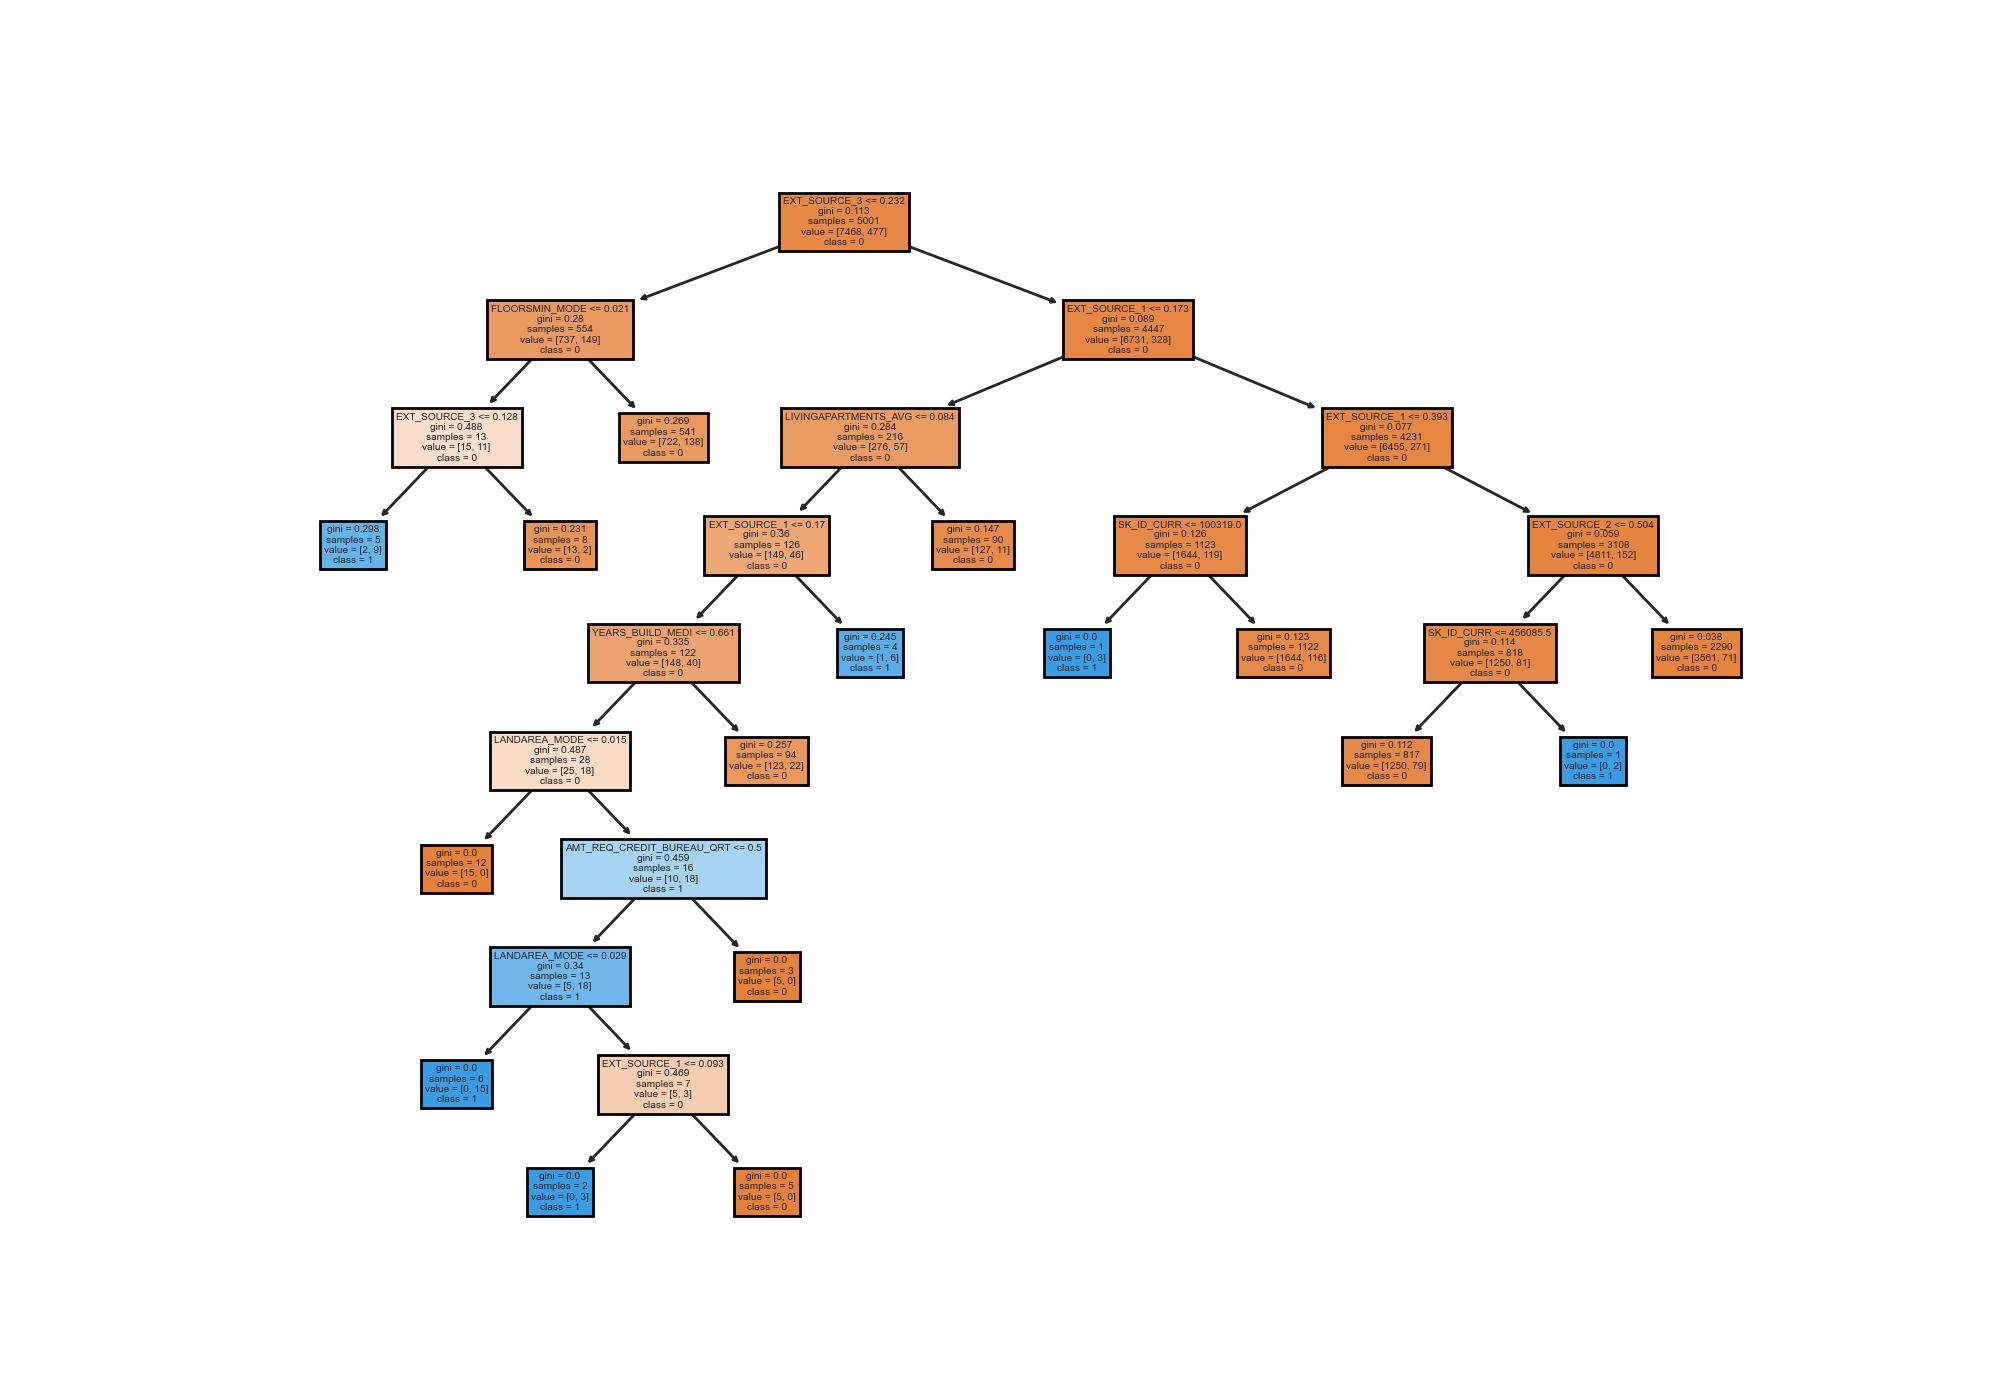

[Text(0.38333333333333336, 0.95, 'EXT_SOURCE_3 <= 0.232\ngini = 0.113\nsamples = 5001\nvalue = [7468, 477]\nclass = 0'),
 Text(0.2, 0.85, 'FLOORSMIN_MODE <= 0.021\ngini = 0.28\nsamples = 554\nvalue = [737, 149]\nclass = 0'),
 Text(0.13333333333333333, 0.75, 'EXT_SOURCE_3 <= 0.128\ngini = 0.488\nsamples = 13\nvalue = [15, 11]\nclass = 0'),
 Text(0.06666666666666667, 0.65, 'gini = 0.298\nsamples = 5\nvalue = [2, 9]\nclass = 1'),
 Text(0.2, 0.65, 'gini = 0.231\nsamples = 8\nvalue = [13, 2]\nclass = 0'),
 Text(0.26666666666666666, 0.75, 'gini = 0.269\nsamples = 541\nvalue = [722, 138]\nclass = 0'),
 Text(0.5666666666666667, 0.85, 'EXT_SOURCE_1 <= 0.173\ngini = 0.089\nsamples = 4447\nvalue = [6731, 328]\nclass = 0'),
 Text(0.4, 0.75, 'LIVINGAPARTMENTS_AVG <= 0.084\ngini = 0.284\nsamples = 216\nvalue = [276, 57]\nclass = 0'),
 Text(0.3333333333333333, 0.65, 'EXT_SOURCE_1 <= 0.17\ngini = 0.36\nsamples = 126\nvalue = [149, 46]\nclass = 0'),
 Text(0.26666666666666666, 0.55, 'YEARS_BUILD_MEDI <=

In [391]:
# plot the random forest of the first estimator
label = ['0', '1']
plt.figure(figsize=(10,7))
tree.plot_tree(model_clf.estimators_[0], feature_names=X.columns, class_names=label, filled=True)

<IPython.core.display.Javascript object>


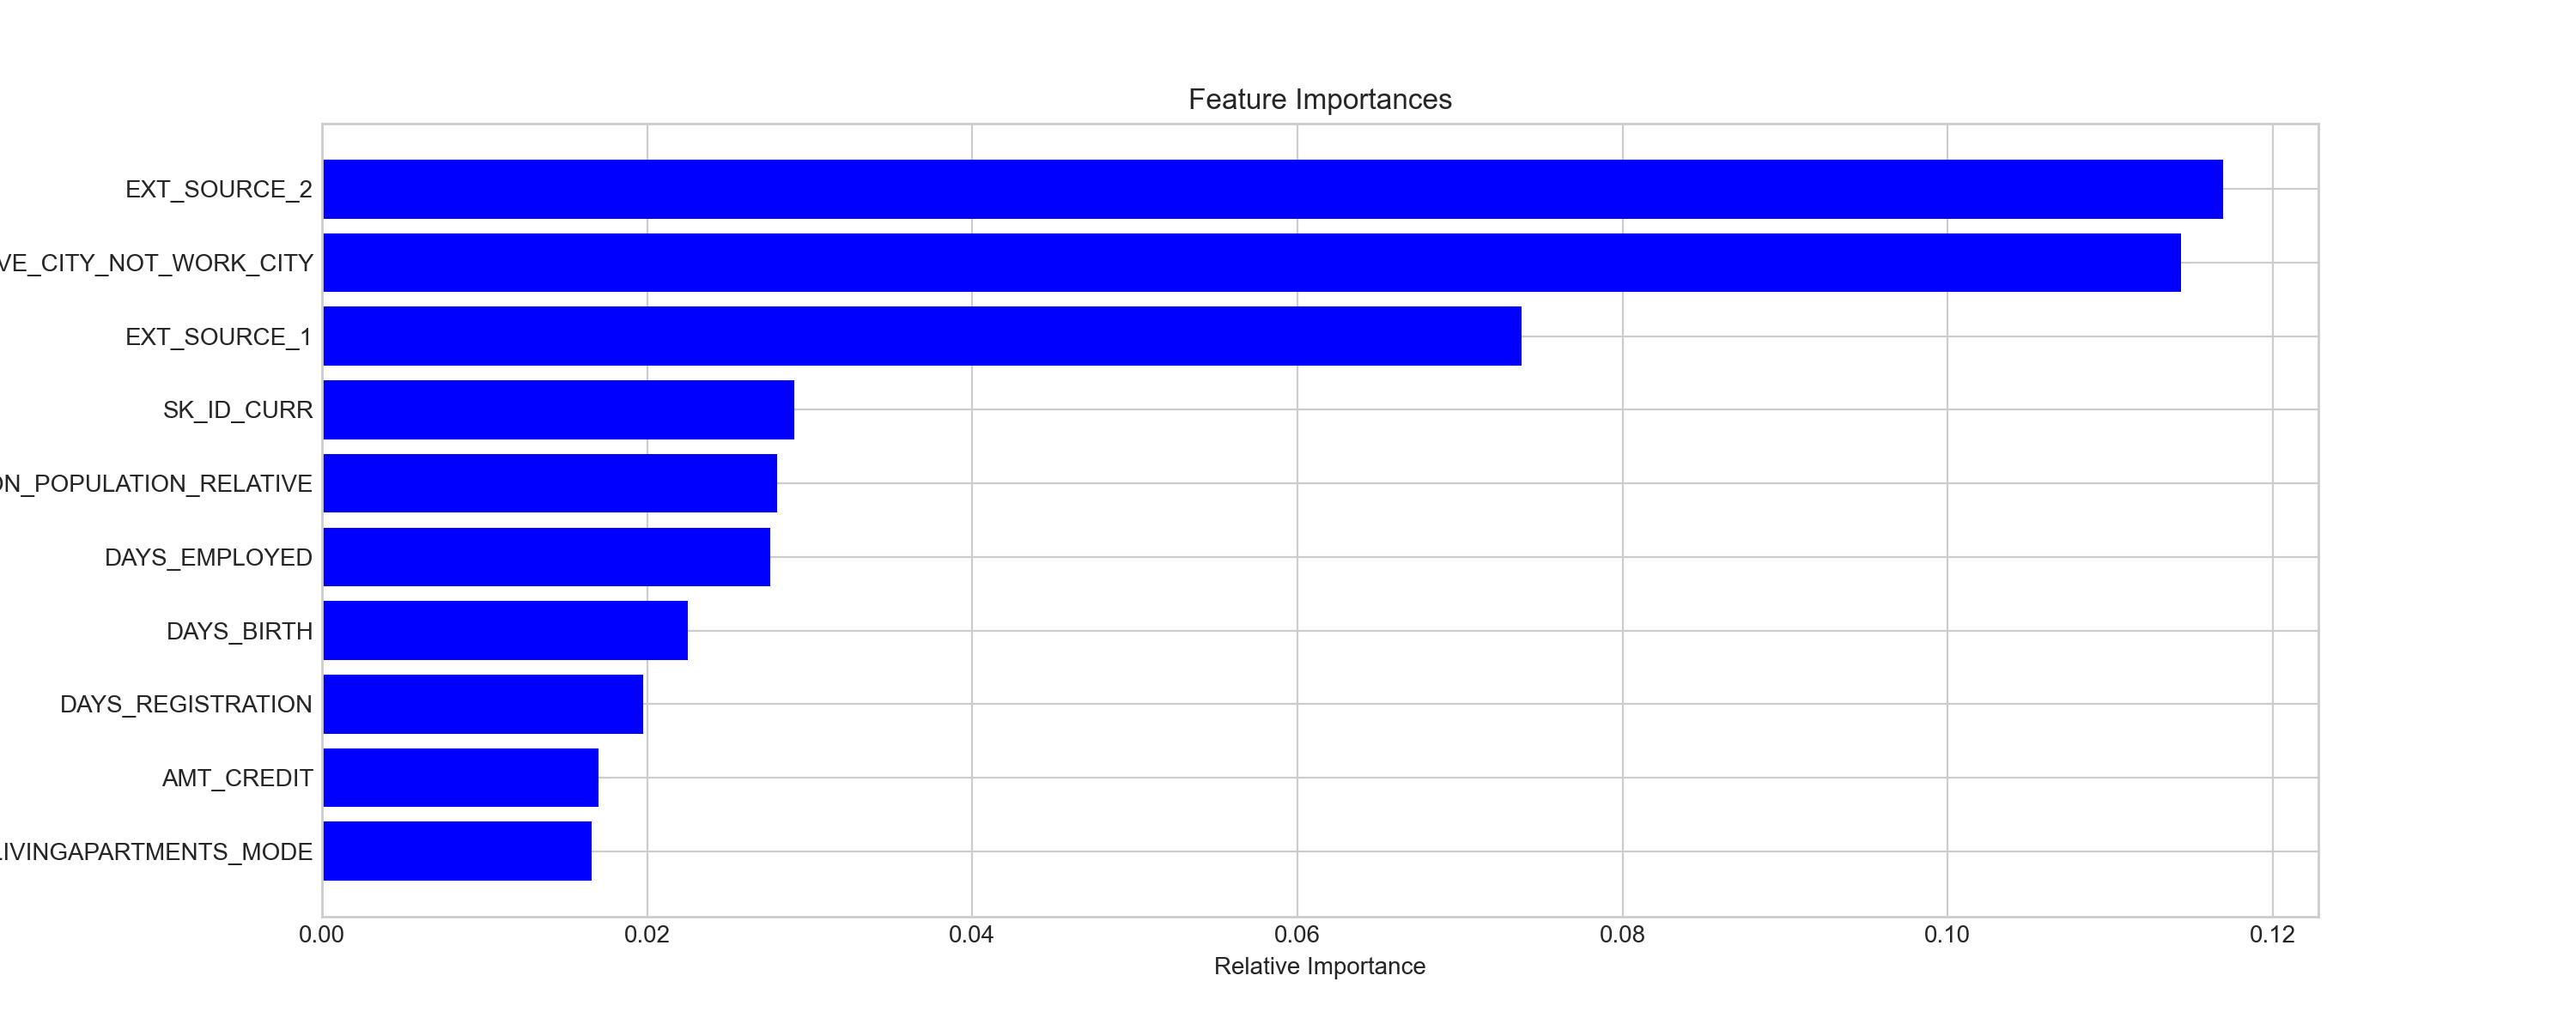

In [415]:
# extract important features from the random forest
# plot top ten important fearture in the random forest model
features = rnd_Train_data.columns
importances = model_clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(15,6))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

Using only the top-ten variables from the variable importance plot, rebuild the random forest and the single classification tree. Plot the single tree.

In [417]:
n_features = ["EXT_SOURCE_1", "EXT_SOURCE_2", "LIVE_CITY_NOT_WORK_CITY", "DAYS_REGISTRATION","TARGET","DAYS_BIRTH","DAYS_EMPLOYED", 
              "AMT_CREDIT", "SK_ID_CURR", "REGION_POPULATION_RELATIVE", "LIVINGAPARTMENTS_MODE"]

new_Train_data = Train_data[n_features]
new_Train_data = new_Train_data.dropna()
             
X = new_Train_data.drop('TARGET', axis = 1)
y = new_Train_data.TARGET

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
new_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes= 16, n_jobs=-1)
new_clf.fit(X_train, y_train)
y_pred_rf = new_clf.predict(X_test) 

evaluate_model(new_clf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.7321
Validation roc auc score= 0.6938

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[29555     0]
 [ 2071     0]]
Validation confusion matrix:
 [[12707     0]
 [  847     0]]


In [419]:
n_features = ["EXT_SOURCE_1", "EXT_SOURCE_2", "LIVE_CITY_NOT_WORK_CITY", "DAYS_REGISTRATION","TARGET","DAYS_BIRTH","DAYS_EMPLOYED", 
              "AMT_CREDIT", "SK_ID_CURR", "REGION_POPULATION_RELATIVE", "LIVINGAPARTMENTS_MODE"]

new2_Train_data = Train_data[n_features]
new2_Train_data = new_Train_data.dropna()

X = new2_Train_data.drop('TARGET', axis = 1)
y = new2_Train_data.TARGET

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()


In [420]:
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [421]:
evaluate_model(clf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.6941
Validation roc auc score= 0.6707

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[29555     0]
 [ 2071     0]]
Validation confusion matrix:
 [[12707     0]
 [  847     0]]


<IPython.core.display.Javascript object>


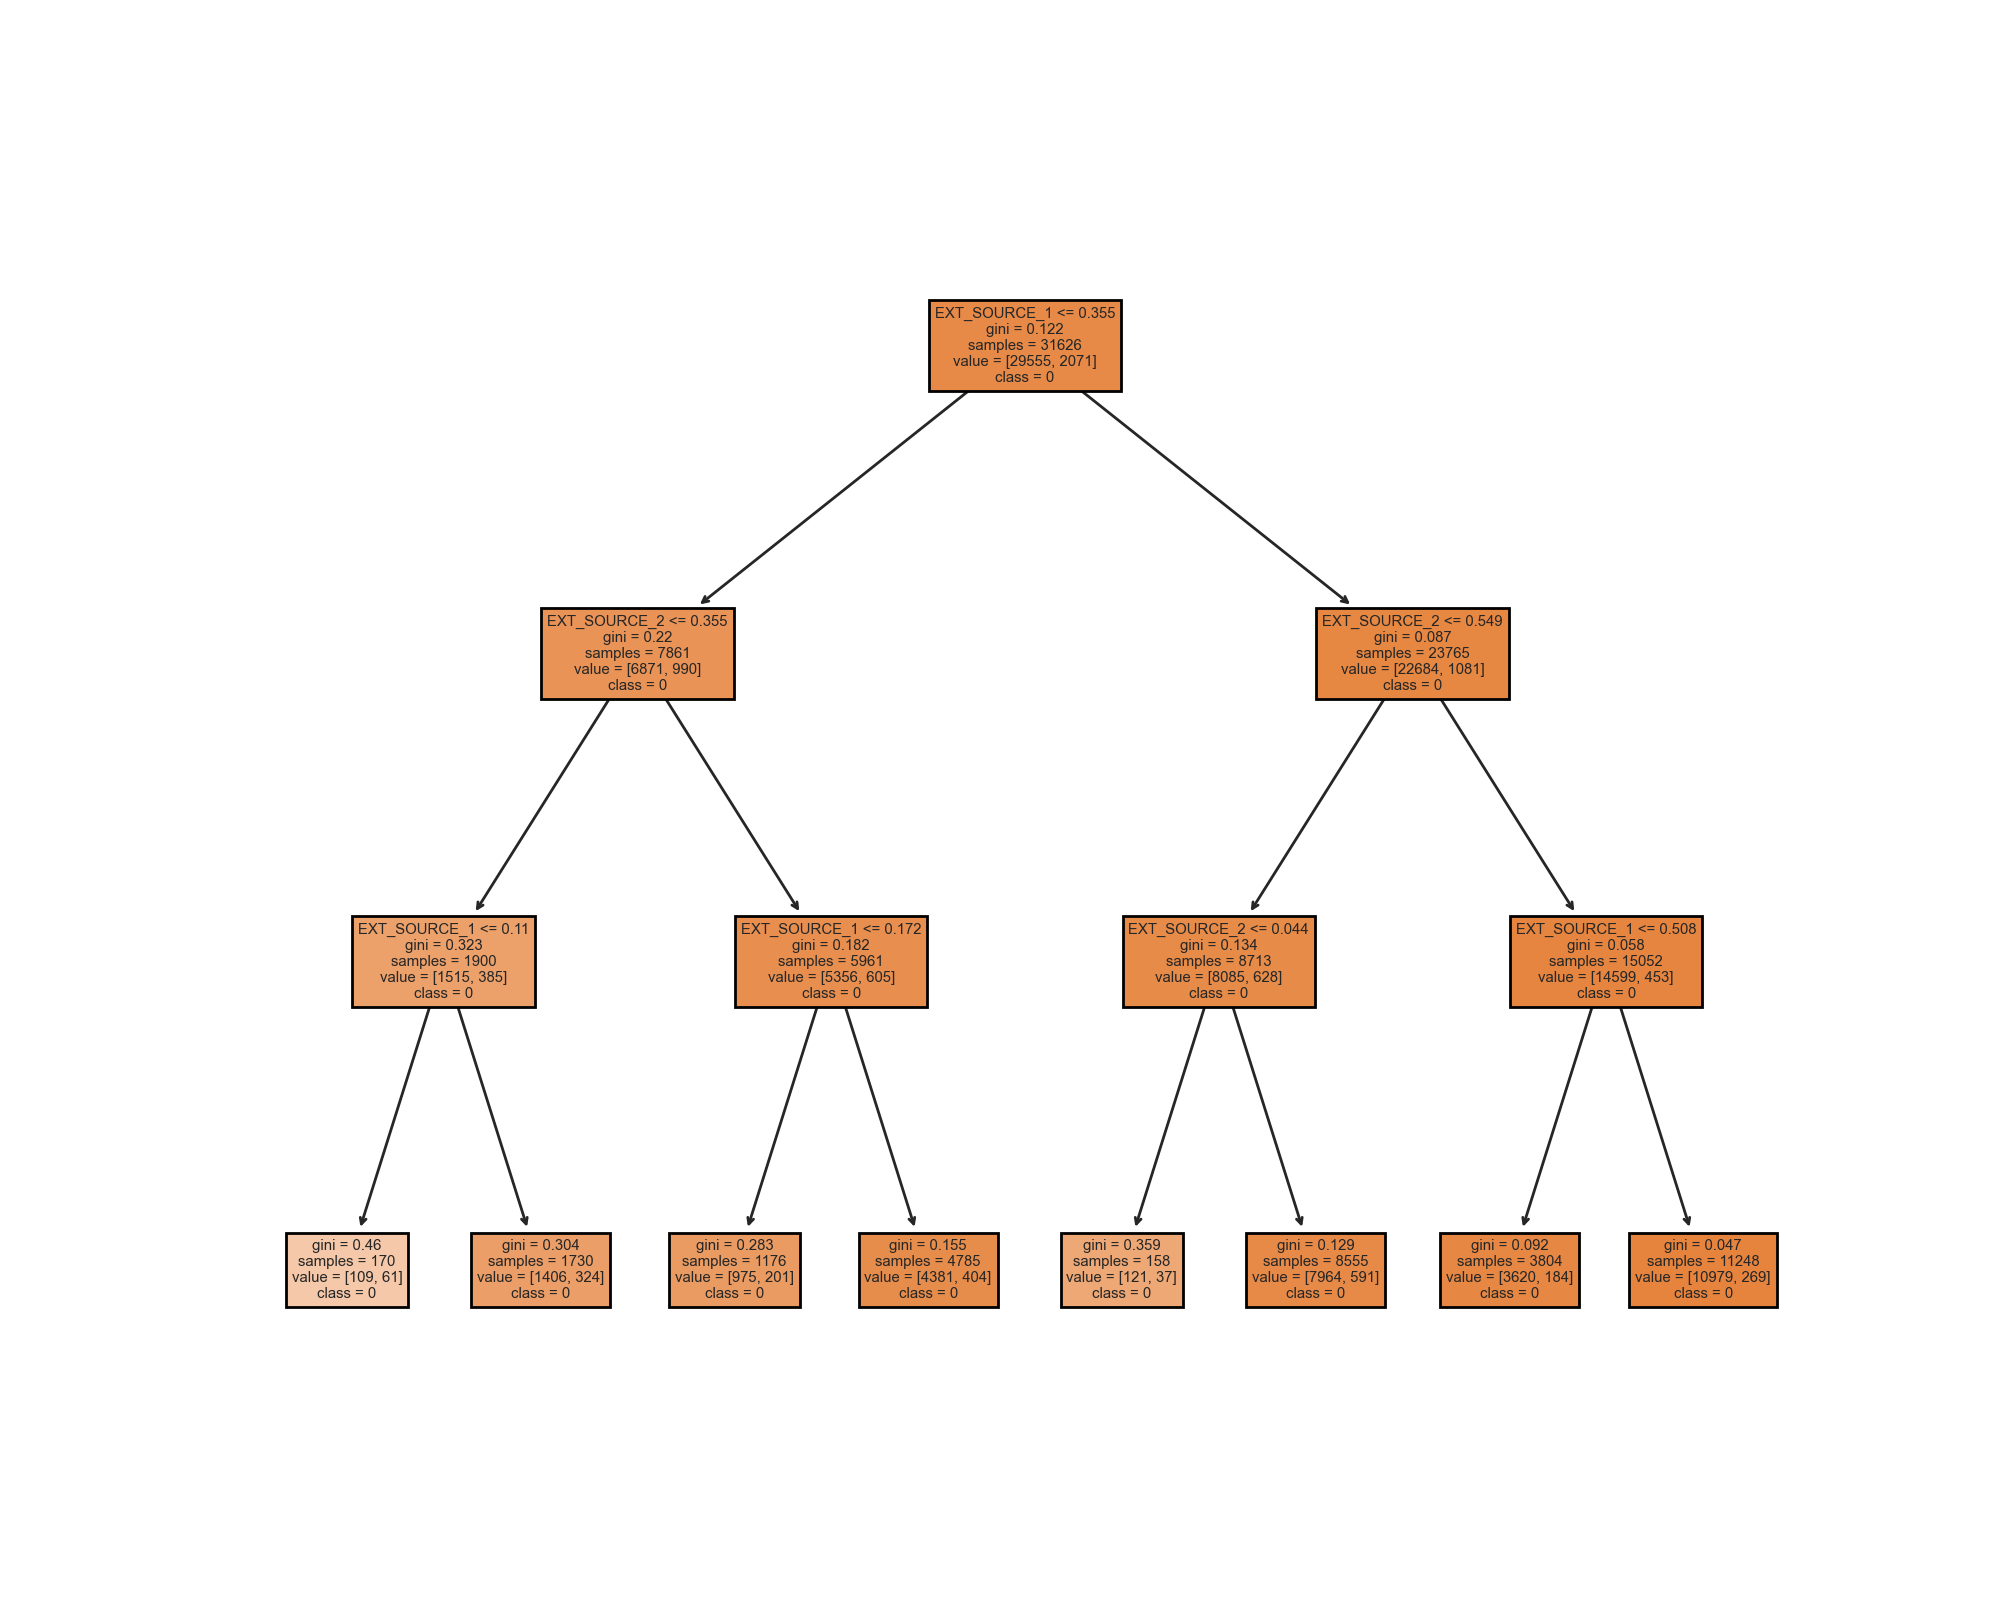

[Text(0.5, 0.875, 'EXT_SOURCE_1 <= 0.355\ngini = 0.122\nsamples = 31626\nvalue = [29555, 2071]\nclass = 0'),
 Text(0.25, 0.625, 'EXT_SOURCE_2 <= 0.355\ngini = 0.22\nsamples = 7861\nvalue = [6871, 990]\nclass = 0'),
 Text(0.125, 0.375, 'EXT_SOURCE_1 <= 0.11\ngini = 0.323\nsamples = 1900\nvalue = [1515, 385]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.46\nsamples = 170\nvalue = [109, 61]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.304\nsamples = 1730\nvalue = [1406, 324]\nclass = 0'),
 Text(0.375, 0.375, 'EXT_SOURCE_1 <= 0.172\ngini = 0.182\nsamples = 5961\nvalue = [5356, 605]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.283\nsamples = 1176\nvalue = [975, 201]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.155\nsamples = 4785\nvalue = [4381, 404]\nclass = 0'),
 Text(0.75, 0.625, 'EXT_SOURCE_2 <= 0.549\ngini = 0.087\nsamples = 23765\nvalue = [22684, 1081]\nclass = 0'),
 Text(0.625, 0.375, 'EXT_SOURCE_2 <= 0.044\ngini = 0.134\nsamples = 8713\nvalue = [8085, 628]\nclass = 0'),
 Text(0.5625,

In [422]:
# plot of decision tree clasifier
label = ['0', '1']
plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train), feature_names=feature_names, class_names=label, filled=True)

    SUMMARY
    The model accuracy for Random forest classifier is far improved when all the numerical variables were nused to build the model
    while using only the top important feature from random forest reduces the overall accuracy for random forest classifier model.
    In contrast, for single classifier model using important feature from the ramdom forest improve the model significantly.
    Lastly, In deciding important features that impact a target, Random forest classifier is a good predictor than carring out correlation matrix because random forest put both the negative and positive correlation into consideration.